In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cebra


# Set random seed for reproducibility
np.random.seed(42)

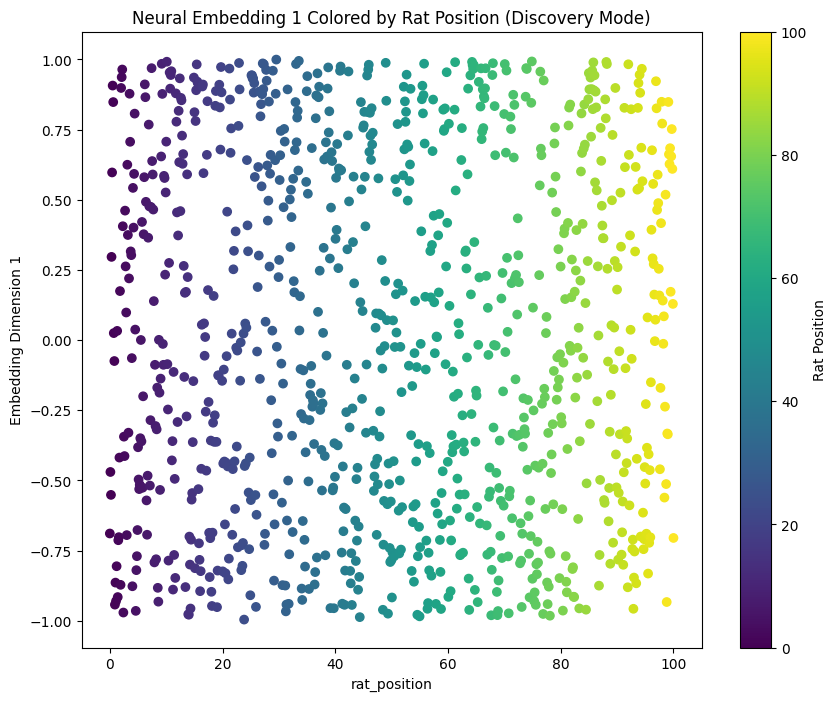

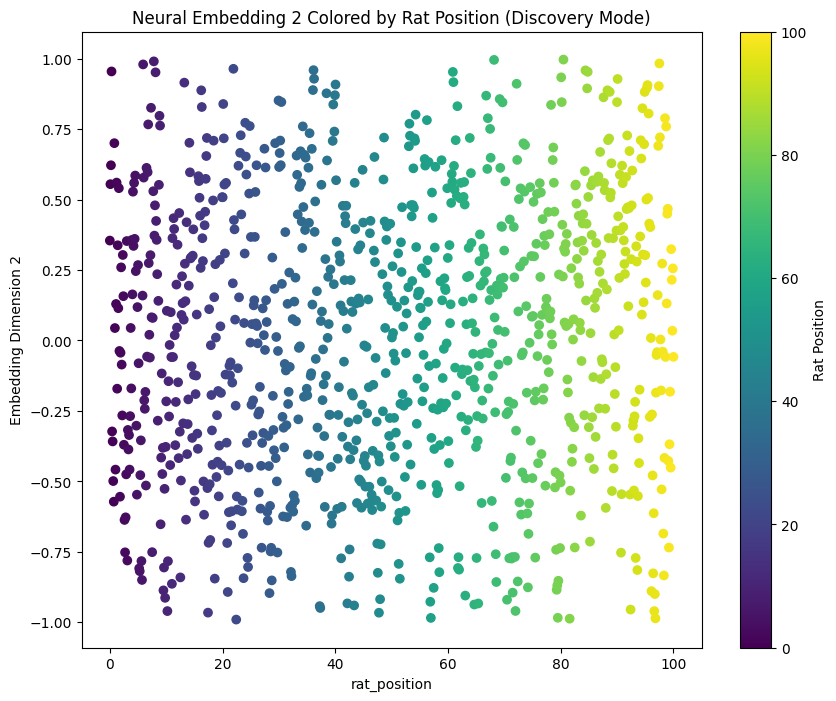

Correlation between embedding dimension 1 and rat position: -0.009460411426181118
Correlation between embedding dimension 2 and rat position: 0.08288286036606547
Correlation between embedding dimension 3 and rat position: 0.07690474264801656


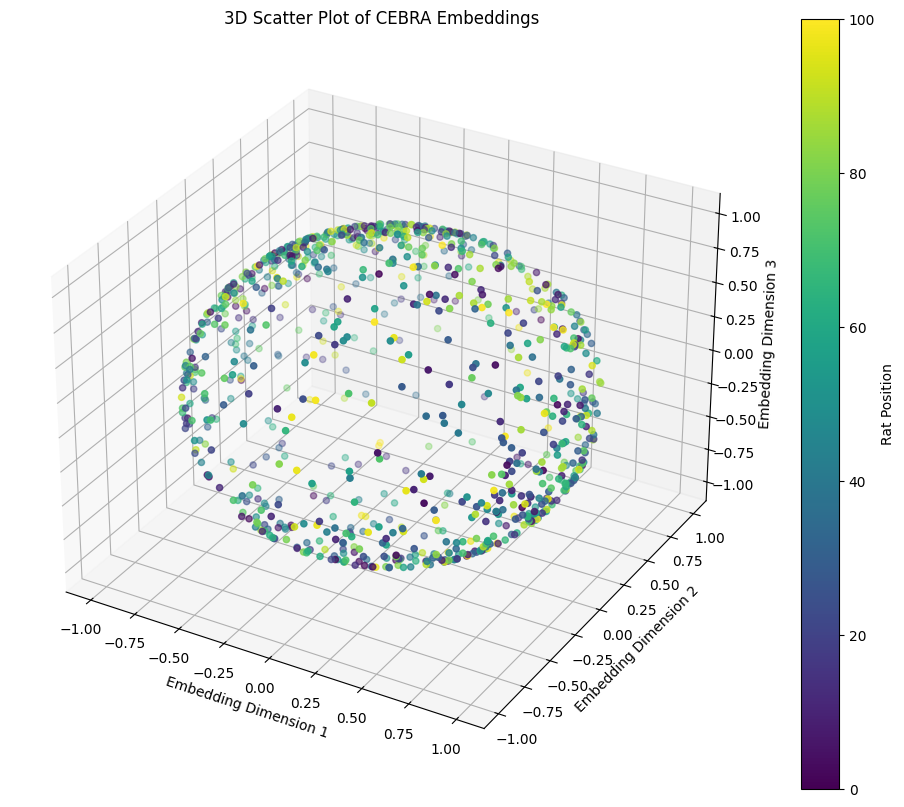

In [9]:


# Generate synthetic data
n_neurons = 100
n_timesteps = 1000  # Increased for better analysis

track_length = 100

# Neural data
neural_data = np.random.normal(loc=1, scale=0.5, size=(n_timesteps, n_neurons))
neural_data = np.maximum(neural_data, 0)

# Synthetic behavioral data
rat_position = np.linspace(0, track_length, n_timesteps)  # straight

# Set up CEBRA model
rand_model = cebra.CEBRA(
    output_dimension=3, 
    batch_size=512,
    learning_rate=3e-4,
    max_iterations=1000
)

# Fit model using only neural data
rand_model.fit(neural_data)

# Get embeddings
embeddings = rand_model.transform(neural_data)

# Visualize embeddings colored by rat position
plt.figure(figsize=(10, 8))
scatter = plt.scatter(rat_position, embeddings[:, 0], c=rat_position, cmap='viridis')
plt.colorbar(scatter, label='Rat Position')
plt.title('Neural Embedding 1 Colored by Rat Position (Discovery Mode)')
plt.xlabel('rat_position')
plt.ylabel('Embedding Dimension 1')
plt.show()

plt.figure(figsize=(10, 8))
scatter = plt.scatter(rat_position, embeddings[:, 1], c=rat_position, cmap='viridis')
plt.colorbar(scatter, label='Rat Position')
plt.title('Neural Embedding 2 Colored by Rat Position (Discovery Mode)')
plt.xlabel('rat_position')
plt.ylabel('Embedding Dimension 2')
plt.show()

# Analyze correlation between embeddings and behavioral variables
for i in range(embeddings.shape[1]):
    correlation = np.corrcoef(embeddings[:, i], rat_position)[0, 1]
    print(f"Correlation between embedding dimension {i+1} and rat position: {correlation}")

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(embeddings[:, 0], 
                     embeddings[:, 1], 
                     embeddings[:, 2], 
                     c=rat_position, 
                     cmap='viridis')

ax.set_xlabel('Embedding Dimension 1')
ax.set_ylabel('Embedding Dimension 2')
ax.set_zlabel('Embedding Dimension 3')
ax.set_title('3D Scatter Plot of CEBRA Embeddings')

cbar = fig.colorbar(scatter, ax=ax, label='Rat Position')

plt.show()

embeddings: (1000, 2)


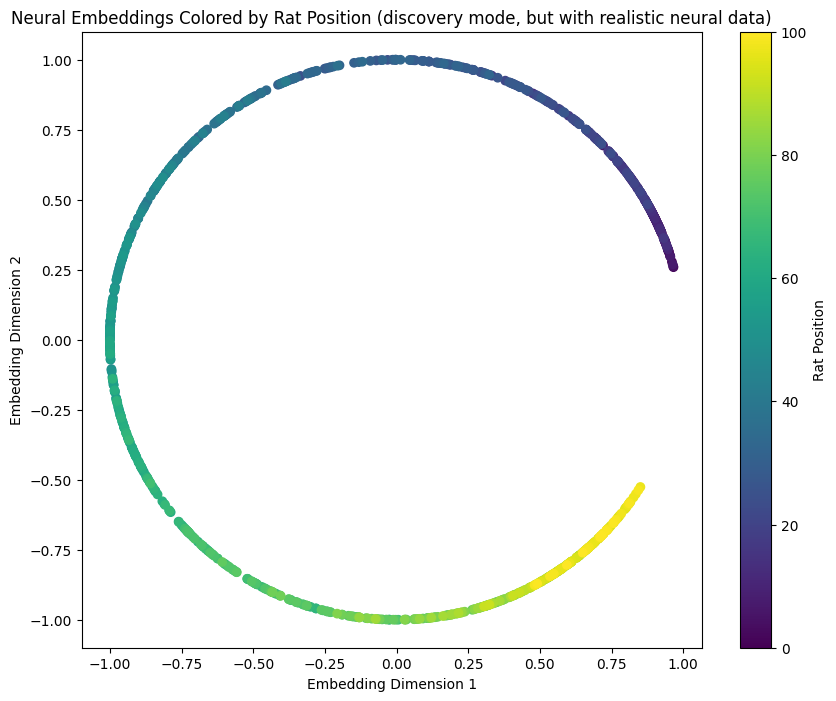

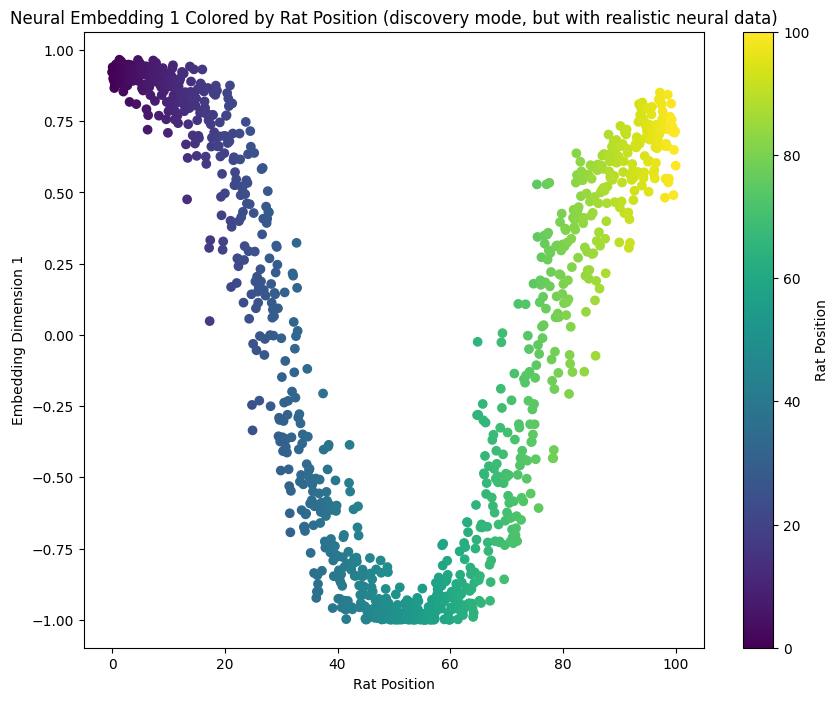

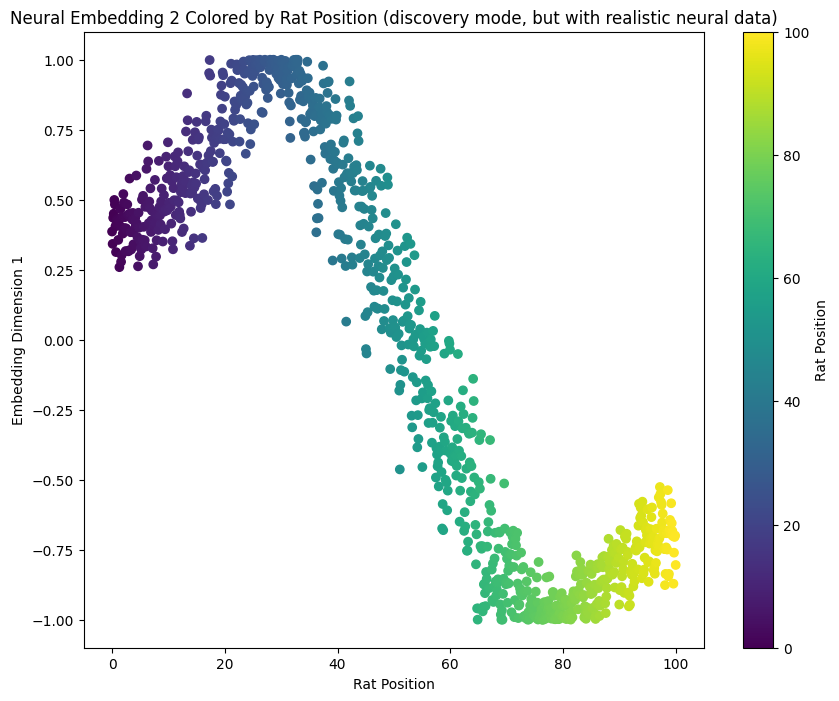

[[0.92236626 0.38631651]
 [0.93960285 0.34226674]
 [0.90021229 0.43545124]
 [0.8929466  0.45016253]
 [0.8664543  0.49925646]
 [0.87554163 0.48314273]
 [0.91435605 0.40491101]
 [0.94978219 0.31291181]
 [0.91058898 0.41331309]
 [0.90252608 0.43063506]]
Correlation between embedding dimension 1 and rat position: -0.1881070753296935
Correlation between embedding dimension 2 and rat position: -0.1881070753296935


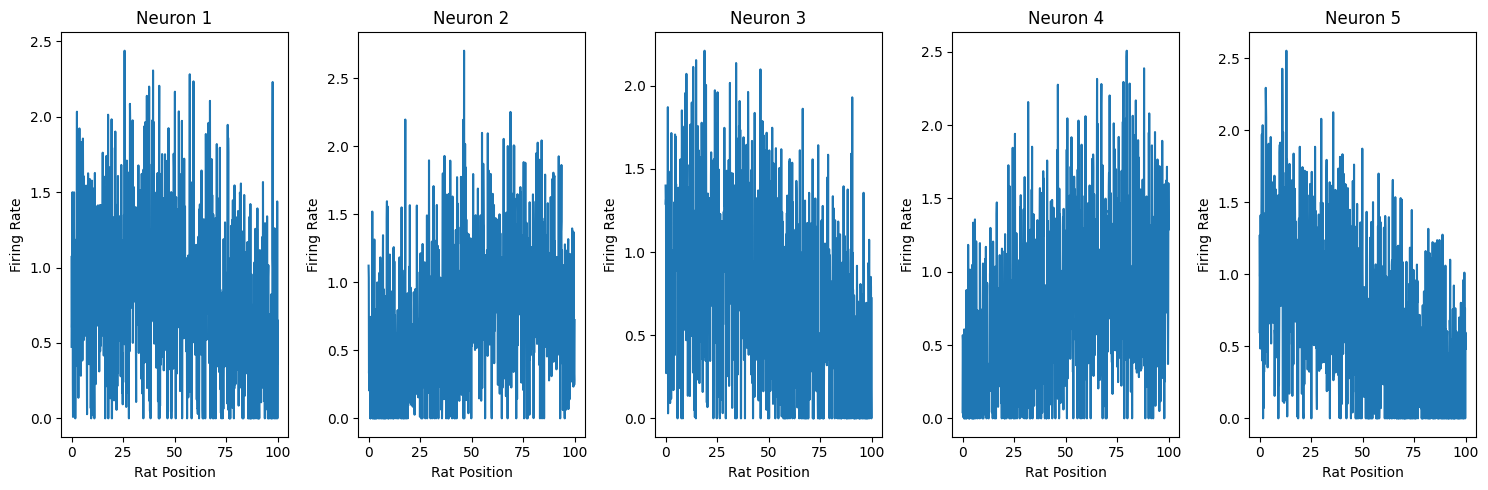

In [10]:

rat_position = np.linspace(0, track_length, n_timesteps)

#print(rat_position[1:10])

# Generate place fields for each neuron
place_fields = np.random.uniform(0, track_length, n_neurons)
field_widths = np.random.uniform(30, 60, n_neurons)  # in degrees

#print(f"place_fields: {place_fields[1:10]}")
#print(f"field_widths {field_widths[1:10]}")

# Generate neural activity based on rat position
neural_data = np.zeros((n_timesteps, n_neurons))
for i in range(n_neurons):
    # Gaussian curve
    neural_data[:, i] = np.exp(-((rat_position - place_fields[i])**2) / (2 * field_widths[i]**2))

# Add noise
neural_data += np.random.normal(0, 0.5, neural_data.shape)
neural_data = np.maximum(neural_data, 0) #non-negative firing
    

# Use CEBRA
model = cebra.CEBRA(output_dimension=2, batch_size=512, learning_rate=3e-4, max_iterations=1000)
model.fit(neural_data)
embeddings = model.transform(neural_data)

print(f"embeddings: {(embeddings.shape)}")

plt.figure(figsize=(10, 8))
scatter = plt.scatter(embeddings[:, 0], embeddings[:, 1], c=rat_position, cmap='viridis')
plt.colorbar(scatter, label='Rat Position')
plt.title('Neural Embeddings Colored by Rat Position (discovery mode, but with realistic neural data)')
plt.xlabel('Embedding Dimension 1')
plt.ylabel('Embedding Dimension 2')
plt.show()

plt.figure(figsize=(10, 8))
scatter = plt.scatter(rat_position, embeddings[:,0], c=rat_position, cmap='viridis')
plt.colorbar(scatter, label='Rat Position')
plt.title('Neural Embedding 1 Colored by Rat Position (discovery mode, but with realistic neural data)')
plt.xlabel('Rat Position')
plt.ylabel('Embedding Dimension 1')
plt.show()

plt.figure(figsize=(10, 8))
scatter = plt.scatter(rat_position, embeddings[:,1], c=rat_position, cmap='viridis')
plt.colorbar(scatter, label='Rat Position')
plt.title('Neural Embedding 2 Colored by Rat Position (discovery mode, but with realistic neural data)')
plt.xlabel('Rat Position')
plt.ylabel('Embedding Dimension 1')
plt.show()

print(embeddings[0:10])

for i in range(embeddings.shape[1]):
    correlation = np.corrcoef(embeddings[:,0], rat_position)[0, 1]
    print(f"Correlation between embedding dimension {i+1} and rat position: {correlation}")

# Visualize a few example neurons
plt.figure(figsize=(15, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.plot(rat_position, neural_data[:, i])
    plt.title(f"Neuron {i+1}")
    plt.xlabel("Rat Position")
    plt.ylabel("Firing Rate")
plt.tight_layout()
plt.show()

Visualizing the Gaussian Tuning Curve

First 3 Embedding dimensions

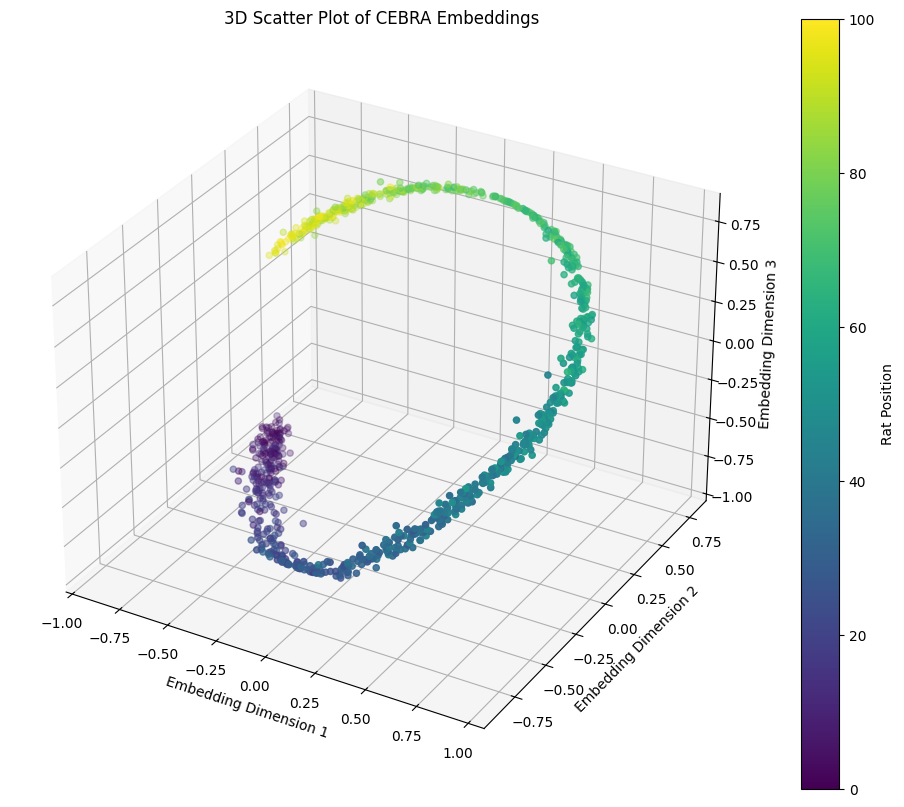

In [11]:
model = cebra.CEBRA(output_dimension=3, batch_size=512, learning_rate=3e-4, max_iterations=1000)
model.fit(neural_data)
embeddings = model.transform(neural_data)

from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(embeddings[:, 0], 
                     embeddings[:, 1], 
                     embeddings[:, 2], 
                     c=rat_position, 
                     cmap='viridis')

ax.set_xlabel('Embedding Dimension 1')
ax.set_ylabel('Embedding Dimension 2')
ax.set_zlabel('Embedding Dimension 3')
ax.set_title('3D Scatter Plot of CEBRA Embeddings')

cbar = fig.colorbar(scatter, ax=ax, label='Rat Position')

plt.show()